In [1]:
#  import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# Read the dataset and save in a datafarme
file_path = r"bank.csv"
bank_df = pd.read_csv(file_path,sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
# Get first 8 rows from bank dataset
bank_df.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no


In [8]:
bank_df.tail(8)  # Get last 8 rows from bank dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [9]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [27]:
bank_df.count()  #Count non-NA cells for each column or row.
bank_df.dtypes   #Return the dtypes in the DataFrame for each column

bank_df.shape    #Return a tuple representing the dimensionality of the DataFrame.  #(4521, 17)
bank_df.shape[0]  #Number of Rows  #4521
bank_df.shape[1]  #Number of Columns  #17

bank_df.size     #Return an int representing the number of elements     #76857
bank_df.columns.size  # NUmber of columns


17

In [28]:
# Create categorical and numerical columns lists separately
dict_bank = bank_df.dtypes
cat_cols = [i for i,j in dict_bank.items() if j=='object']

num_cols = bank_df.select_dtypes(exclude = 'object').columns
cat_cols,num_cols

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y'],
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))

In [36]:
# Get unique values of each categoricalcolumn
for i in cat_cols:
    print(i.center(40,"="))
    print(bank_df[i].unique())

==================job===================
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
================marital=================
['married' 'single' 'divorced']
===============education================
['primary' 'secondary' 'tertiary' 'unknown']
================default=================
['no' 'yes']
================housing=================
['no' 'yes']
==================loan==================
['no' 'yes']
================contact=================
['cellular' 'unknown' 'telephone']
=================month==================
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
================poutcome================
['unknown' 'failure' 'other' 'success']
===================y====================
['no' 'yes']


In [47]:
bank_df.take([1]) #Return the elements in the given *positional* indices along an axis. Default axis=0
bank_df.take([4,6])
bank_df.take([4,6,9],axis=1) # axis=1 means - columns data

,default,housing,day
0,no,no,19
1,no,yes,11
2,no,yes,16
3,no,yes,3
4,no,yes,5
...,...,...,...
4516,no,yes,30
4517,yes,yes,9
4518,no,no,19
4519,no,no,6


In [61]:
bank_df.iloc  #Purely integer-location based indexing for selection by position
bank_df.iloc[1]   #Values in Row_index=1, All columns
bank_df.iloc[2,5]  #Value in Row_index=2, Col_index=5 
bank_df.iloc[4:10] #Values from Row_index: 4 to 10-1, All columns
bank_df.iloc[4:10,1]  #Values from Row_index: 4 to 10-1,Col_index=1
bank_df.iloc[4:9,2:5]  #Values from Row_index: 4 to 9-1,Col_index=2 to 4
# bank_df.iloc['job']  # TypeError: Cannot index by location index with a non-integer key


,marital,education,default
4,married,secondary,no
5,single,tertiary,no
6,married,tertiary,no
7,married,secondary,no
8,married,tertiary,no


In [70]:
bank_df.loc    #Access a group of rows and columns by label(s) or a boolean array.
bank_df.loc[5]  #All columns, Row_index =5
bank_df.loc[:,'education']  #All rows data, Column 'education' data

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
          ...    
4516    secondary
4517     tertiary
4518    secondary
4519    secondary
4520     tertiary
Name: education, Length: 4521, dtype: object

#### Create Frequency Table for each categorical columns in bank dataset

In [113]:
cat_col_list = bank_df.select_dtypes(include='object').columns
cols = ['Labels','Data']
for i in range(1,len(cat_col_list)):
    cat_col_dict = bank_df[cat_col_list[i]].value_counts()
    cat_col_dataframes = pd.DataFrame(zip(cat_col_dict.keys(),cat_col_dict.values),columns=cols) # Created DataFrame for each cat column with unique data
    cat_col_dataframes.to_csv(f'{cat_col_list[i]}.csv',index=False)  #Create csv files for each DataFrame created from above line

#### Create Barchart for each Categorical column in bank data set

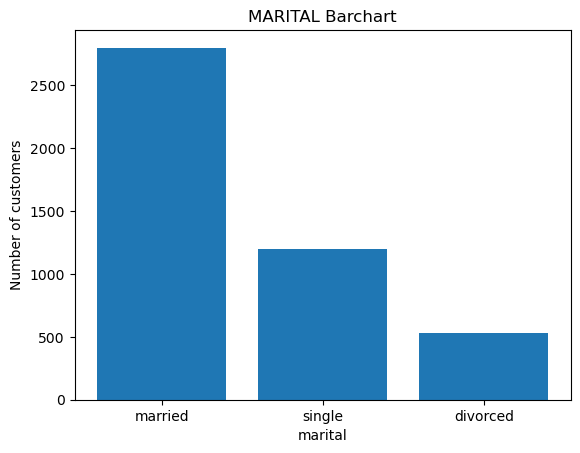

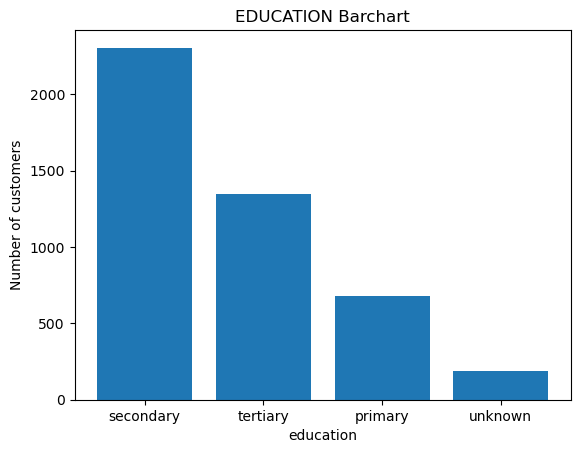

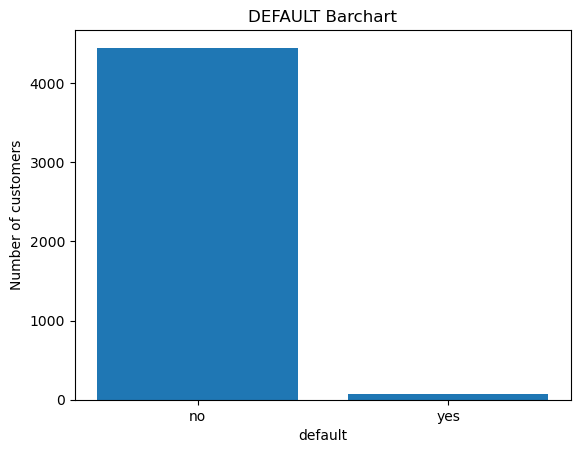

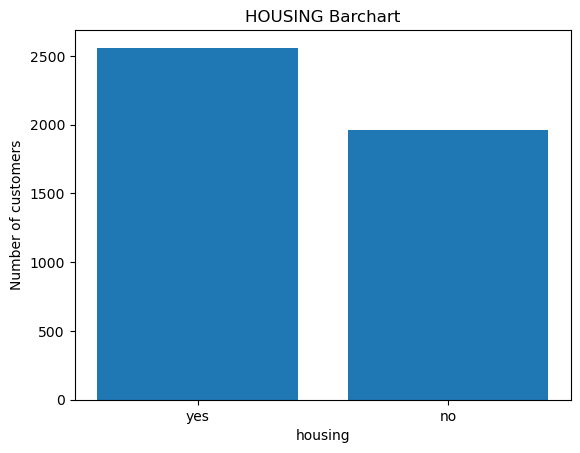

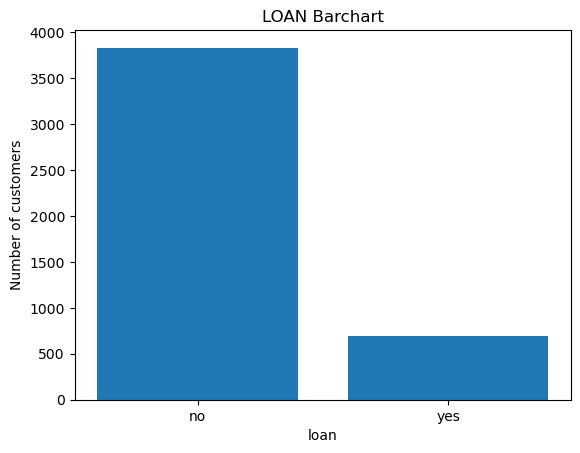

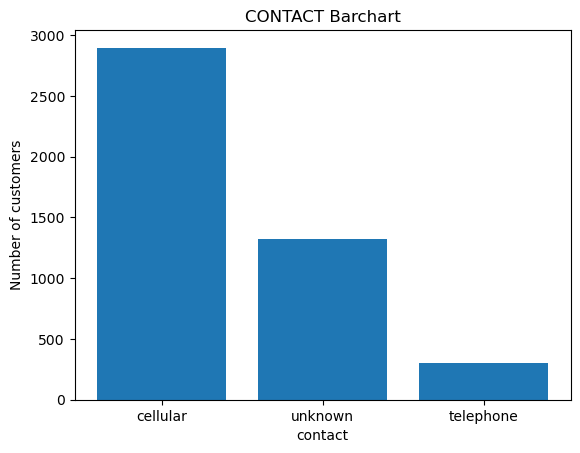

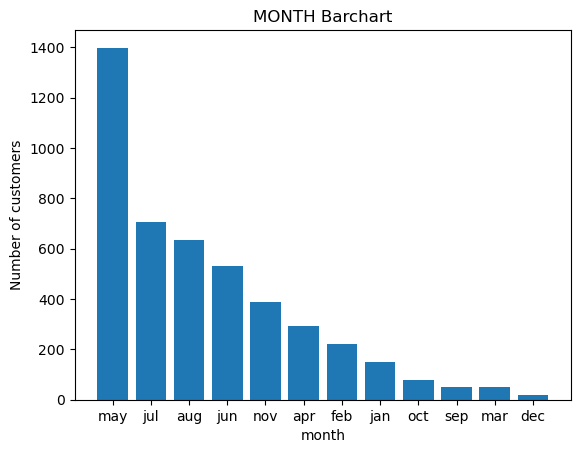

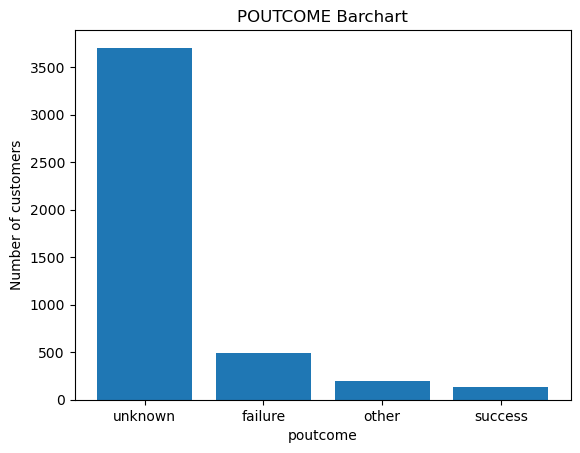

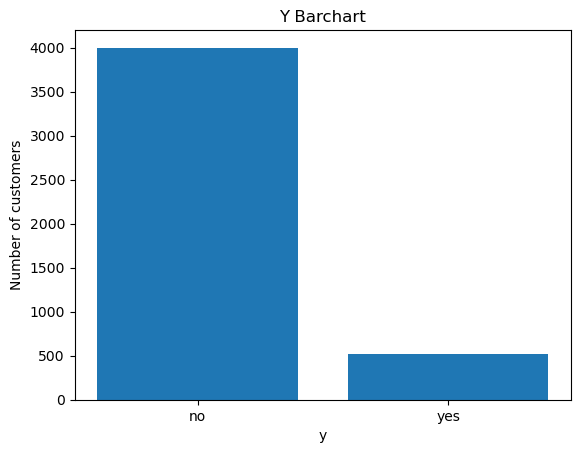

In [127]:
import matplotlib.pyplot as plt

cat_col_list = bank_df.select_dtypes(include='object').columns
cols = ['Labels','Data']
for i in range(1,len(cat_col_list)):
    cat_col_dict = bank_df[cat_col_list[i]].value_counts()   # Returns dictionary with Frequency of each distinct row
    cat_col_dataframe = pd.DataFrame(zip(cat_col_dict.keys(),cat_col_dict.values),columns=cols) # Created DataFrame for each cat column with unique data
    plt.bar('Labels','Data',data=cat_col_dataframe)
    plt.title(f'{cat_col_list[i].upper()} Barchart')
    plt.xlabel(cat_col_list[i])
    plt.ylabel('Number of customers')
    plt.savefig(cat_col_list[i]+".png")  # SAve the Barchart
    plt.show()                           # Show the Barchart